In [1]:
import os
from google.colab import userdata

# Set the API token as an environment variable
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

Archive chat link: https://chatgpt.com/c/a4666297-3f4e-4afb-938c-4e174f9b2308?model=gpt-4

In [2]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements(is_chapter2=True)

!pip install datasets==2.11.0

fatal: destination path 'notebooks' already exists and is not an empty directory.
/content/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!
  Using cached datasets-2.11.0-py3-none-any.whl (468 kB)
  Attempting uninstall: datasets
    Found existing installation: datasets 1.16.1
    Uninstalling datasets-1.16.1:
      Successfully uninstalled datasets-1.16.1


In [3]:
from utils import *
setup_chapter()

Using transformers v4.16.2
Using datasets v2.11.0


In [4]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"Number of datasets currently available on the Hub: {len(all_datasets)}")
print(f"First 10 datasets: {all_datasets[:10]}")

#emotion_datasets = [dataset for dataset in all_datasets if dataset.endswith("emotion")]
#print(emotion_datasets)


Number of datasets currently available on the Hub: 166990
First 10 datasets: ['amirveyseh/acronym_identification',
'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa',
'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news',
'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar',
'legacy-datasets/allegro_reviews']


In [5]:
# hide_output
from datasets import load_dataset

emotions = load_dataset("jeffnyman/emotions")
print(emotions)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotions downloaded and prepared to /root/.cache/huggingface/datasets/jeffnyman___emotions/split/1.0.0/6beca17f26eb017bb98d323e37c70d7d7f157f3d15a6a12c2e4cf7aa7cbef5a5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [6]:
train_ds = emotions["train"]
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [7]:
print(train_ds.column_names)
print(train_ds.features)
print(train_ds[:5])

['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness',
'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake', 'im
grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic
about the fireplace i will know that it is still on the property', 'i am feeling
grouchy'], 'label': [0, 0, 3, 2, 3]}


GPT Links Archive:
- CS EE Notes - Keras Simplifies Neural Networks: https://chatgpt.com/c/a74b5448-22eb-47d4-8329-88f6e7e808c4
- CS EE Notes - DistilBERT Last Hidden State: https://chatgpt.com/c/a74b5448-22eb-47d4-8329-88f6e7e808c4

In [8]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}

--2024-06-22 05:41:04--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 13.33.30.23, 13.33.30.49, 13.33.30.76, ...
Connecting to huggingface.co (huggingface.co)|13.33.30.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  7.09MB/s    in 0.2s    

2024-06-22 05:41:05 (7.09 MB/s) - ‘train.txt’ saved [1658616/1658616]



In [9]:
!head -n 1 train.txt

emotions_local = load_dataset("csv", data_files="train.txt", sep=";", names=["text", "label"])
emotions_local

# even simpler approach"
"""
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
                               names=["text", "label"])
"""

i didnt feel humiliated;sadness


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-92e1f09e1056c227/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

'\ndataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"\nemotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",\n                               names=["text", "label"])\n'

In [10]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


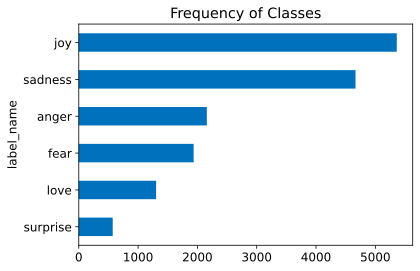

In [12]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

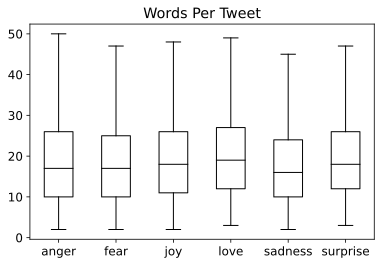

In [13]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [14]:
# resetting the format here since we no longer need it anymore
emotions.reset_format()

In [15]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']


In [16]:
# numericalisation // converting each character here into a unique integer
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)
# printing out the "text" variable to idx
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}
[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7,
14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [17]:
# exemplar of mapping names to a unique ids // showing ordinal first. then one-hot encoding afterwards

categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
print(categorical_df)

            Name  Label ID
0      Bumblebee         0
1  Optimus Prime         1
2       Megatron         2


In [18]:
# one-hot encoding implementation:

pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [19]:
# now converting the original input_ids to one-hot encoding (nominal) instead of ordinal


import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [20]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [21]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [22]:
# alternatively // the code can also be retrieved using "from transformers import DistilBertTokenizer"
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt) # AutoTokenizer belongs to larger set of "auto" classes. Basically allows for easy switching between different models.

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [23]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953,
2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [24]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


In [25]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [26]:
tokenizer.vocab_size

30522

In [27]:
print(tokenizer.model_max_length)
print(tokenizer.model_input_names) # helps to know what's the name of the fields which the model expects in its forward pass

512
['input_ids', 'attention_mask']


In [28]:
### Tokenising the Whole Dataset

# will be using a lot of "map()" on DatasetDict object to tokenise the whole corpus <-- method provides convenient way to apply a function to each element in dataset ++ used to create new rows and columns

def tokenize(batch): # the method that will be applied to map()
    return tokenizer(batch["text"], padding=True, truncation=True)

In [29]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000,
2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300,
102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1]]}


In [30]:
#hide_input
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [31]:
# hide_output
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


# Training a Text Classifier

- Using feature extraction. Training from last hidden layer alone instead of modifying whole pipeline (+ including pretrained model == fine-tuning)

In [32]:
# Using pre-trained models

from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

In [33]:
text = "This is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].shape}")

Input tensor shape: torch.Size([1, 6])


In [34]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad(): # disables the automatic calculation of gradient. Not needed during inference.
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ...,
-0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [35]:
print(outputs.last_hidden_state.size())
print(outputs.last_hidden_state[:,0].size())

torch.Size([1, 6, 768])
torch.Size([1, 768])


In [36]:
def extract_hidden_states(batch):
    # Places model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [37]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True) # this will forces the default batch_size=1000 to be used instead
print(emotions_hidden)

emotions_hidden["train"].column_names

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask',
'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask',
'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask',
'hidden_state'],
        num_rows: 2000
    })
})


['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [38]:
# Creating a feature matrix

import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [39]:
# Visualising the Dataset
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.10/dist-packages/umap/distances.py:1053: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1061: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1076: NumbaDeprecationWarning: The 'nopython' keyword argume

,X,Y,label
0,4.181736,6.385870,0
1,-3.095621,5.648930,0
2,4.960250,2.944781,3
3,-2.500390,3.606624,2
4,-3.225451,3.676204,3


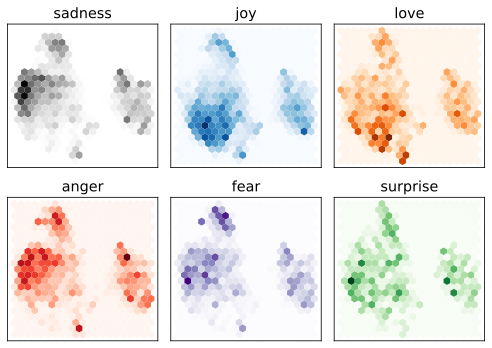

In [40]:
# Plotting density of points for each category separately...

fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [41]:
# Training a simple classifier // we increase 'max_iter' to guarantee convergence

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [42]:
lr_clf.score(X_valid, y_valid)

0.634

In [43]:
# compare logistic regression to dummy classifier (basically just use probability based on distribution of training set)

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

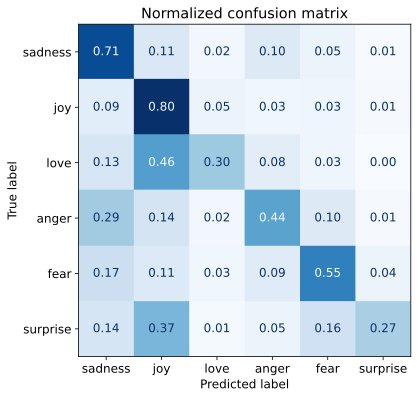

In [44]:
# Can further investigate the performance of this classifier with confusion matrix.

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

# for results below. can see that model tends to confuse anger and fear with sadness // and love and suprise are mistaken for joy

# Fine-tuning Transformers

Now moving on to alternatvie approach. Fine-tuing a transformer end-to-end.

In [45]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

In [46]:
# Defining ther performance matrix // F_1 score + accuracy of model is used

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [51]:
from huggingface_hub import notebook_login

notebook_login()

In [52]:
from huggingface_hub import whoami

!git config --global user.email "shng2025@gmail.com"
!git config --global user.name "shng2025"

whoami()

{'type': 'user',
 'id': '66666279ff4c7b97eceb8392',
 'name': 'shng2025',
 'fullname': 'Shi Hao Ng',
 'email': 'shng2025@gmail.com',
 'emailVerified': True,
 'canPay': False,
 'periodEnd': None,
 'isPro': False,
 'avatarUrl': 'https://cdn-avatars.huggingface.co/v1/production/uploads/noauth/x3DS-Y6GpQkTXaXDxaF42.png',
 'orgs': [],
 'auth': {'type': 'access_token',
  'accessToken': {'displayName': 'Google Colab (Write)',
   'role': 'write',
   'createdAt': '2024-06-22T04:52:06.697Z'}}}

In [53]:
# Defining training parameters

from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [54]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
/content/notebooks/distilbert-base-uncased-finetuned-emotion is already a clone of https://huggingface.co/shng2025/distilbert-base-uncased-finetuned-emotion. Make sure you pull the latest changes with `repo.git_pull()`.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this 

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.270800,0.188420,0.923500,0.923046
2,0.149900,0.167854,0.930500,0.930796


TrainOutput(global_step=500, training_loss=0.210331298828125, metrics={'train_runtime': 243.2905, 'train_samples_per_second': 131.53, 'train_steps_per_second': 2.055, 'total_flos': 720342861696000.0, 'train_loss': 0.210331298828125, 'epoch': 2.0})

In [55]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [56]:
preds_output.metrics

{'test_loss': 0.1678536832332611,
 'test_accuracy': 0.9305,
 'test_f1': 0.9307956945016709,
 'test_runtime': 4.0784,
 'test_samples_per_second': 490.386,
 'test_steps_per_second': 7.846}

In [57]:
# if memory serves me right. argmax provides the very right column, which is the last hidden state equivalent
y_preds = np.argmax(preds_output.predictions, axis=1)

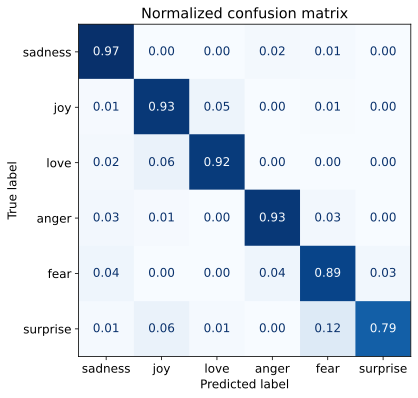

In [58]:
plot_confusion_matrix(y_preds, y_valid, labels)

### Error Analysis

Now investigating the model's prediction a little bit further before moving on. Simple and powerful technique here is to sort validation samples by model loss. When forward-pass, the loss is automatically calculated and returned. Function below:

In [59]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [60]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values // notice how .map() is effectively used here
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [61]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [62]:
# can now easilky sort emotions_encoded by losses in ascending or descending order. Goal: detect wrong labels (annotators make mistake or disagree)
# or quirks of the dataset (IRL dataset is messy // inspecting quirks can lead to insights! e.g. cleaning data or injecting simillar examples to make
# more robust!)

df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,6.943905
882,i feel badly about reneging on my commitment t...,love,sadness,6.382865
1963,i called myself pro life and voted for perry w...,joy,sadness,5.935117
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.686598
1111,im lazy my characters fall into categories of ...,joy,fear,5.600097
1274,i am going to several holiday parties and i ca...,joy,sadness,5.359883
1801,i feel that he was being overshadowed by the s...,love,sadness,5.195437
1509,i guess this is a memoir so it feels like that...,joy,fear,4.930837
1836,i got a very nasty electrical shock when i was...,fear,anger,4.697067
1581,i feel stronger clearer but a little annoyed n...,anger,joy,4.566453


In [63]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
578,i got to christmas feeling positive about the ...,joy,joy,0.003778
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.003821
1873,i feel practically virtuous this month i have ...,joy,joy,0.003826
1263,i feel this way about blake lively,joy,joy,0.003918
1921,i feel the need to write i always want to writ...,joy,joy,0.003952
131,i feel like a graph doesnt show the data accur...,joy,joy,0.003996
604,i don t like to use the h word recklessly but ...,joy,joy,0.004010
1226,im feeling terrific and in great shape im opti...,joy,joy,0.004017
260,i am feeling so invigorated and so ready to ke...,joy,joy,0.004046
1528,i am feeling a little happy with him,joy,joy,0.004068


Conclusion: we can see that joy is sometimes mislabeled. And model is very confident in predicting sadness. Hence, with this information, we can make improvements...

In [76]:
# Saving and sharing the model
"""
trainer.push_to_hub(commit_message="Training completed!")
"""

'\ntrainer.push_to_hub(commit_message="Training completed!")\n'

In [82]:
# Use a pipeline as a high-level helper
%cd ..
from transformers import pipeline

pipe = pipeline("text-classification", model="shng2025/distilbert-base-uncased-finetuned-emotion")

/


Downloading:   0%|          | 0.00/883 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [84]:
custom_tweet = "I saw a movie today and it was really good."
preds = pipe(custom_tweet, return_all_scores=True)

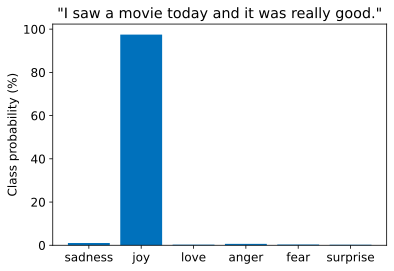

In [85]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()



---



In [ ]:
# GPT notes

"""
import torch
import torch.nn as nn

# Define the linear layer
linear_layer = nn.Linear(in_features=4, out_features=1)

# Example input tensor of shape [2, 4]
input_tensor = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                             [5.0, 6.0, 7.0, 8.0]])

# Pass the input through the linear layer
output_tensor = linear_layer(input_tensor)

# Print the output tensor
print("Output Tensor:", output_tensor)
print("Output Shape:", output_tensor.shape)
"""

In [ ]:
"""
from huggingface_hub import Repository

# Assuming you've set up the local directory for the Repository
model_repo_url = "https://huggingface.co/shng2025/distilbert-base-uncased-finetuned-emotion"

repo = Repository(local_dir="/content/distilbert-base-uncased-finetuned-emotion", clone_from=model_repo_url,
                  use_auth_token="", git_user="Ice-Citron", git_email="shng2025@gmail.com")
#repo.git_pull()
"""